In [3]:
import cv2
import numpy as numpy
import matplotlib.pyplot as plt

In [4]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg',0)
denis = cv2.imread('../DATA/Denis_Mukwege.jpg')
solvay = cv2.imread('../DATA/solvay_conference.jpg')

In [5]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    
    for(x,y,w,h) in face_rects:
        cv2.rectangle(face_img,(x,y),(x+w,y+h),(255,255,255),10)
        ret,face_img[y:y+h,x:x+w] = cv2.threshold(face_img[y:y+h,x:x+w],127,255,cv2.THRESH_BINARY) 
        
    return face_img

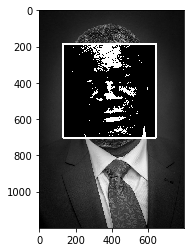

In [41]:
result = detect_face(denis)
plt.imshow(result,'gray')

In [7]:
cap = cv2.VideoCapture(0)

while True:
    ret,frame = cap.read(0)
    #frame = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    frame = detect_face(frame)
    cv2.imshow('Face',frame)
    
    k=cv2.waitKey(1)
    if k == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()